In [1]:
# 加载必须的库

import numpy as py
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

# 加载自定义工具库
from init_utils import *

# 设置好画图工具
#matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


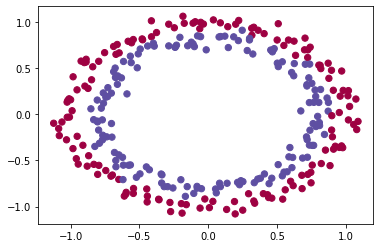

In [4]:
# 加载数据

train_X, train_Y, test_X, test_Y = load_dataset()

In [9]:
# 构建模型
# initialization 取值 'zeros', 'random', 'he'

def model(X, Y, learning_rate=0.01, num_iterations=15000, print_cost=True, initialization='he'):
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 10, 5, 1]

    # 根据参数选择初始化方式
    if initialization == 'zeros':
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == 'random':
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == 'he':
        parameters = initialize_parameters_he(layers_dims)
    
    # 开始训练
    for i in range(num_iterations):
        a3, cache = forward_propagation(X, parameters)
        cost = compute_loss(a3, Y)
        grads = backward_propagation(X, Y, cache)
        parameters = update_parameters(parameters, grads, learning_rate)

        # 打印损失
        if print_cost and i%1000 == 0:
            print('Cost After iteration {}: {}'.format(i, cost))
            costs.append(cost)
    
     # 画出成本走向图
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

In [5]:
# 最差方式，把 w 全部初始化为 0

def initialize_parameters_zeros(layers_dims):
    parameters = {}
    L = len(layers_dims)

    # 跳过输入层
    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))

    return parameters

Cost After iteration 0: 0.6931471805599453
Cost After iteration 1000: 0.6931471805599453
Cost After iteration 2000: 0.6931471805599453
Cost After iteration 3000: 0.6931471805599453
Cost After iteration 4000: 0.6931471805599453
Cost After iteration 5000: 0.6931471805599453
Cost After iteration 6000: 0.6931471805599453
Cost After iteration 7000: 0.6931471805599453
Cost After iteration 8000: 0.6931471805599453
Cost After iteration 9000: 0.6931471805599453
Cost After iteration 10000: 0.6931471805599455
Cost After iteration 11000: 0.6931471805599453
Cost After iteration 12000: 0.6931471805599453
Cost After iteration 13000: 0.6931471805599453
Cost After iteration 14000: 0.6931471805599453


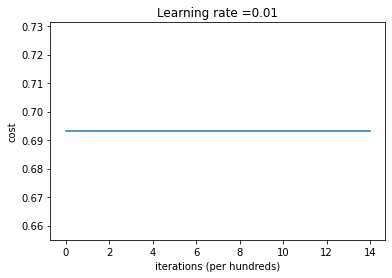

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [10]:
# 使用全 0 初始化 w 进行参数训练

parameters = model(train_X, train_Y, initialization='zeros')
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ('On the test set:')
predictions_test = predict(test_X, test_Y, parameters)

从表格上分析，成本一直没有下降；

精确度只有 0.5，没有预测能力；

In [11]:
print("predictions_train = " + str(predictions_train))
print("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


可以看到，预测结果全部为 0；

In [17]:
def initialize_parameters_random(layers_dims):
    # 设置随机数种子
    np.random.seed(3)

    parameters = {}
    L = len(layers_dims)

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))

    return parameters

/home/linux/workspace/my-deep-learning/4.init parameters/init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/home/linux/workspace/my-deep-learning/4.init parameters/init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost After iteration 0: inf
Cost After iteration 1000: 0.6242434241539614
Cost After iteration 2000: 0.5978811277755388
Cost After iteration 3000: 0.5636242569764779
Cost After iteration 4000: 0.5500958254523324
Cost After iteration 5000: 0.544339206192789
Cost After iteration 6000: 0.5373584514307651
Cost After iteration 7000: 0.469574666760224
Cost After iteration 8000: 0.39766324943219844
Cost After iteration 9000: 0.3934423376823982
Cost After iteration 10000: 0.3920158992175907
Cost After iteration 11000: 0.38913979237487845
Cost After iteration 12000: 0.3861261344766218
Cost After iteration 13000: 0.3849694511273874
Cost After iteration 14000: 0.3827489017191917


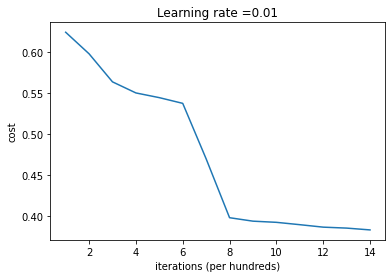

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [19]:
parameters = model(train_X, train_Y, initialization='random')
print("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)


使用随机数初始化 w 后，成本下降了，精确度也提高了，预测能力也提高了；

In [20]:
print("predictions_train = " + str(predictions_train))
print("predictions_test = " + str(predictions_test))


predictions_train = [[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
predictions_test = [[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


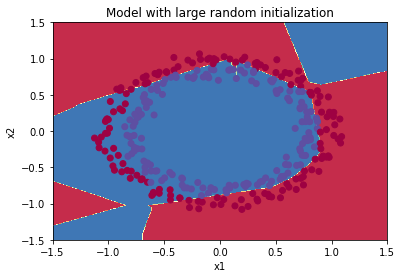

In [21]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(
    parameters, x.T), train_X, train_Y)


In [22]:
# 好的参数初始化方法

def initialize_parameters_he(layers_dims):
    # 设计随机数种子
    np.random.seed(3)

    parameters = {}
    L = len(layers_dims)

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2 / layers_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))

    return parameters

Cost After iteration 0: 0.8830537463419761
Cost After iteration 1000: 0.6879825919728063
Cost After iteration 2000: 0.6751286264523371
Cost After iteration 3000: 0.6526117768893807
Cost After iteration 4000: 0.6082958970572938
Cost After iteration 5000: 0.5304944491717495
Cost After iteration 6000: 0.4138645817071794
Cost After iteration 7000: 0.31178034648444414
Cost After iteration 8000: 0.23696215330322562
Cost After iteration 9000: 0.18597287209206836
Cost After iteration 10000: 0.15015556280371808
Cost After iteration 11000: 0.12325079292273546
Cost After iteration 12000: 0.09917746546525932
Cost After iteration 13000: 0.08457055954024276
Cost After iteration 14000: 0.0735789596267737


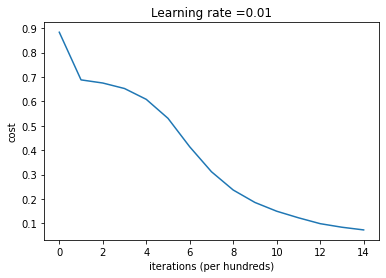

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [24]:
parameters = model(train_X, train_Y, initialization='he')
print("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)


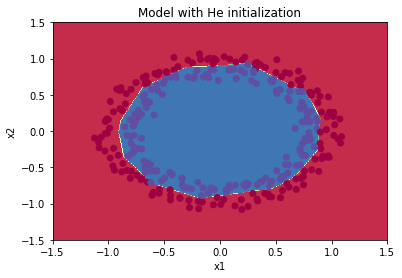

In [25]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(
    parameters, x.T), train_X, train_Y)
